In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

In [3]:
from xgboost import XGBClassifier

In [4]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 11.7,8.27
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.set_palette('viridis')
print("Setup Complete")

Setup Complete


In [5]:
df = pd.read_csv('../input/titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


<AxesSubplot:>

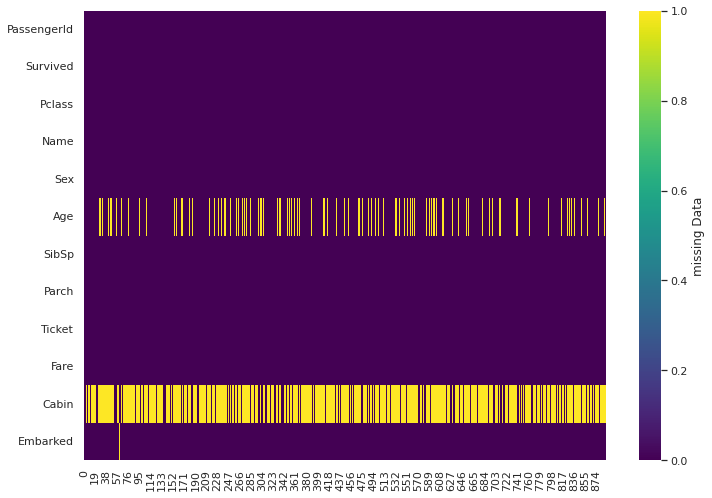

In [8]:
sns.heatmap(df.isnull().transpose(),cmap="viridis", cbar_kws={"label": 'missing Data'})

<AxesSubplot:>

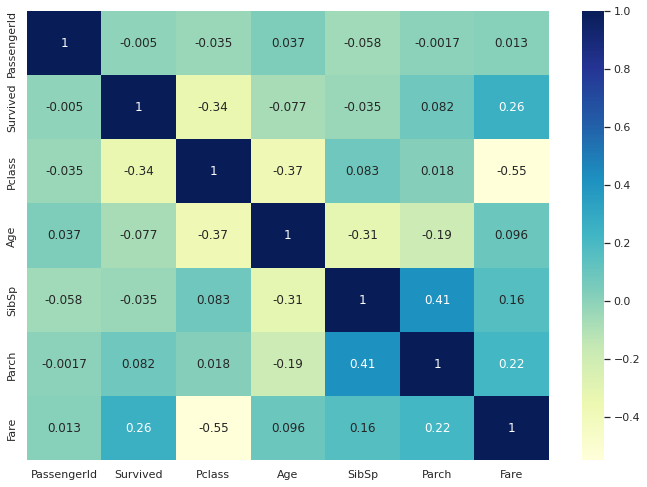

In [9]:
sns.heatmap(df.corr(), cmap="YlGnBu",annot=True)

In [10]:
newDf = df.drop('Cabin', axis=1)

In [11]:
newDf['Age'] = newDf['Age'].fillna(newDf['Age'].mean())
newDf = newDf.dropna(axis=0, how='any')
print(newDf.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


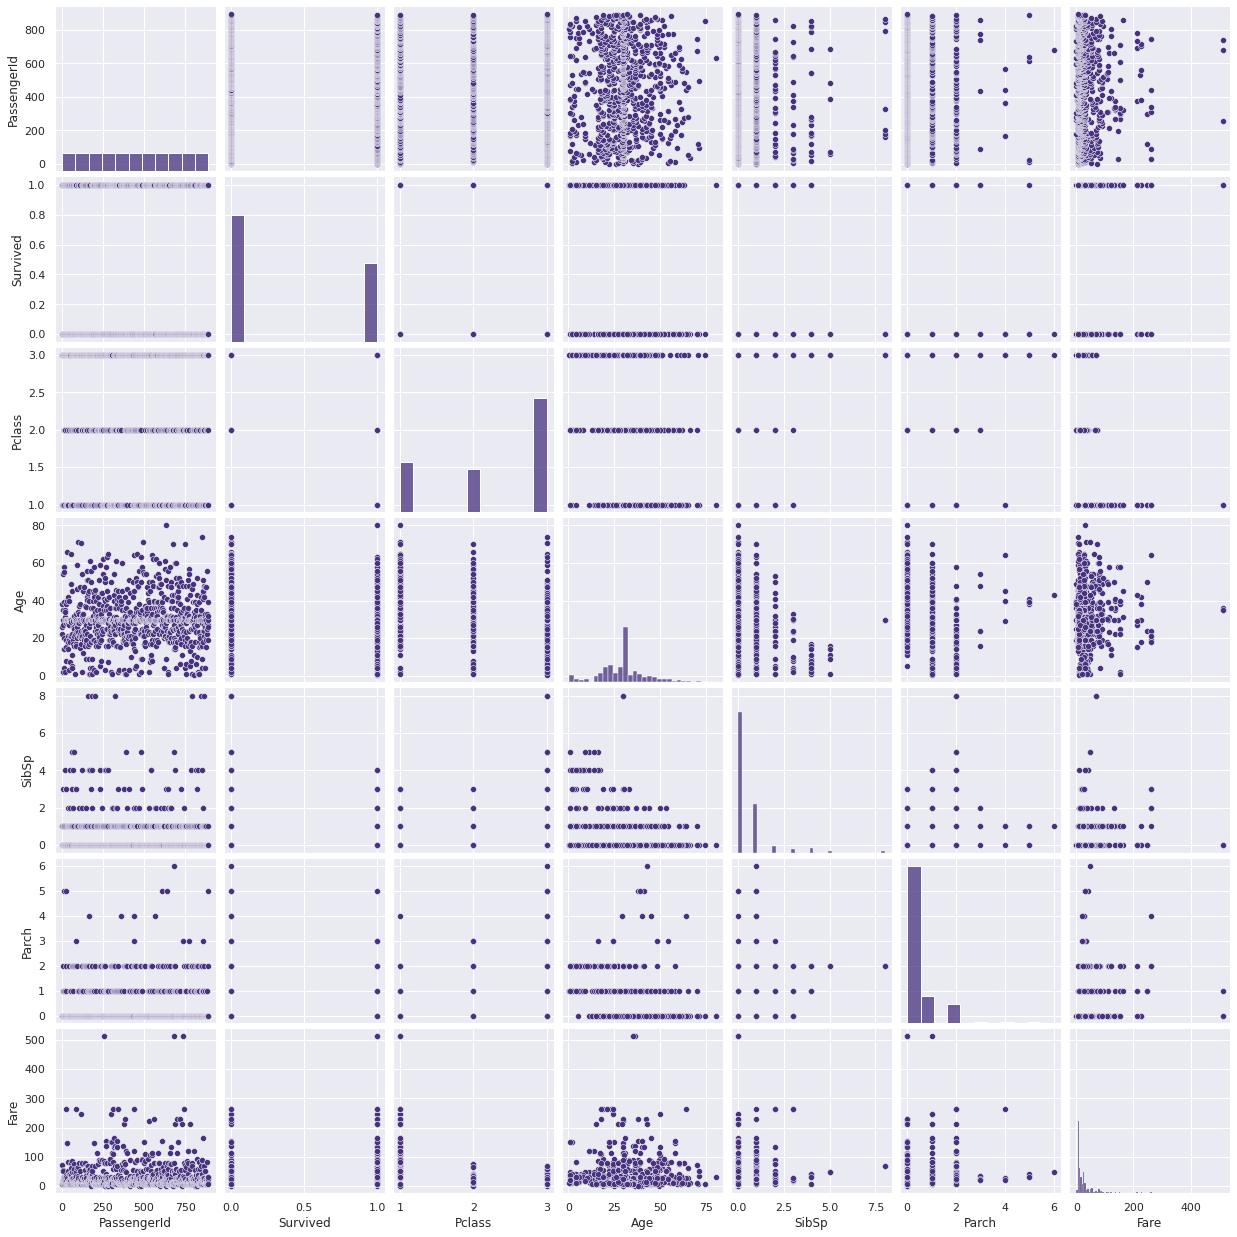

In [12]:
sns.pairplot(newDf)

Text(0.5, 1.0, 'Titanic Surviors by Gender')

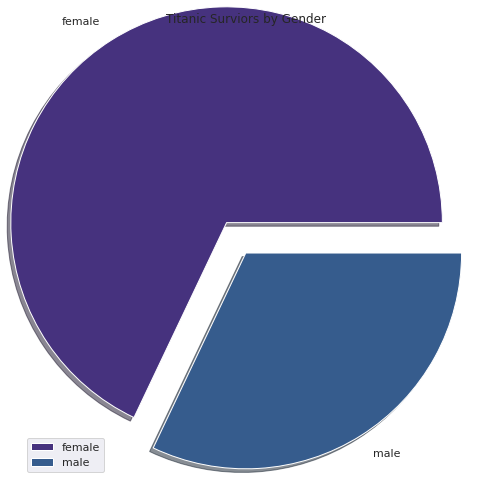

In [13]:
survied = newDf[newDf['Survived'] == 1]['Sex'].value_counts()
victims = newDf[newDf['Survived'] == 0]['Sex'].value_counts()

plt.pie(survied,labels= ['female', 'male'],
        shadow=0.6,
        explode=[0.2, 0],
        radius=1.2,)
plt.legend()
plt.title('Titanic Surviors by Gender')

[[Text(0, 0, 'Did not Survive'), Text(1, 0, 'Survied')],
 Text(0.5, 1.0, 'Titanic Survival Data')]

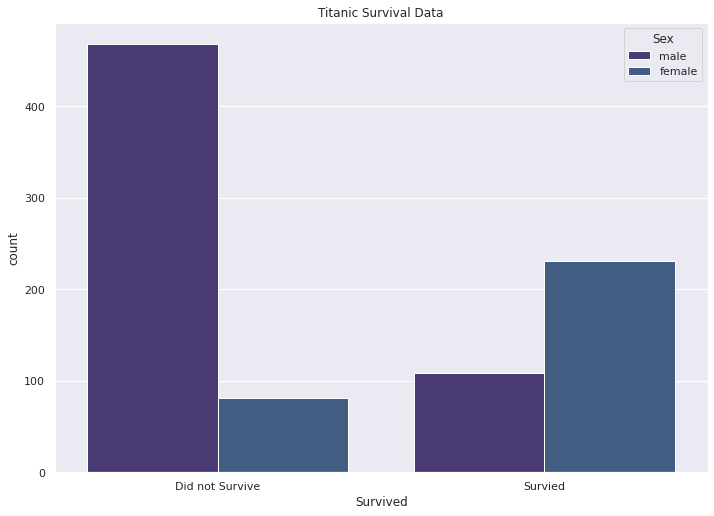

In [14]:
sns.countplot(data=newDf, x = 'Survived', hue='Sex',).set(xticklabels = ['Did not Survive', 'Survied'], title = 'Titanic Survival Data')

[Text(0.5, 1.0, 'Co - realation of Survival w.r.t Gender')]

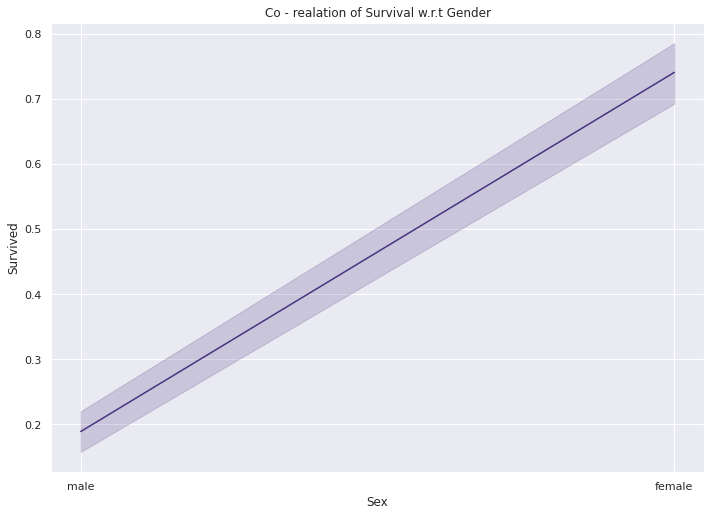

In [15]:
sns.lineplot(data=newDf, x = 'Sex', y ='Survived').set(title='Co - realation of Survival w.r.t Gender')

[Text(0.5, 1.0, 'Co - realation of Survival w.r.t Age')]

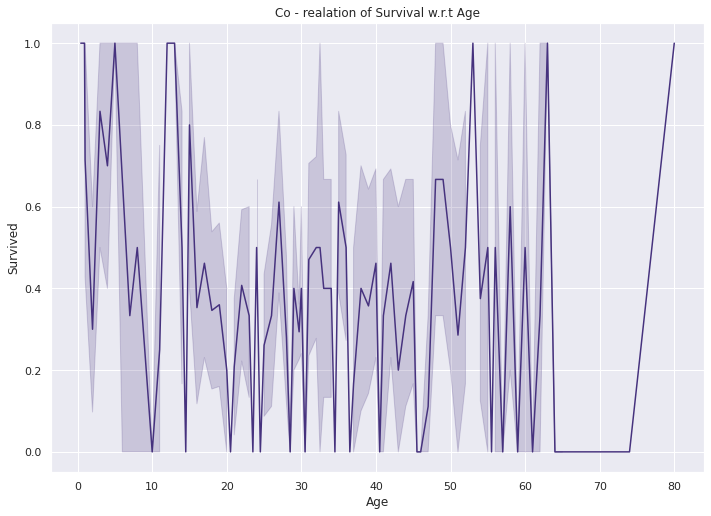

In [16]:
sns.lineplot(data = newDf, x = 'Age', y = 'Survived').set(title = 'Co - realation of Survival w.r.t Age')

<Figure size 842.4x595.44 with 0 Axes>

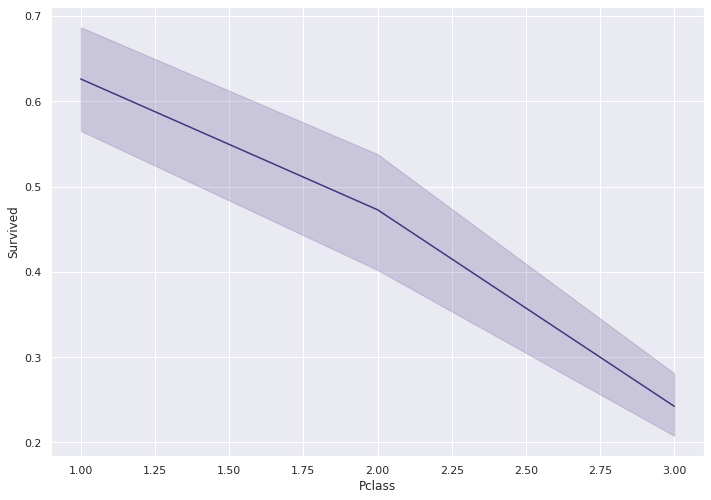

<Figure size 842.4x595.44 with 0 Axes>

In [17]:
sns.lineplot(data=newDf, x = 'Pclass', y = 'Survived')
plt.figure()

<AxesSubplot:xlabel='Pclass', ylabel='count'>

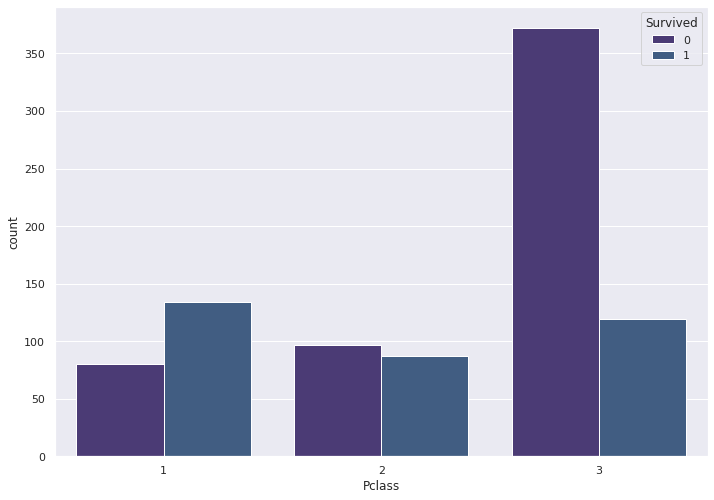

In [18]:
sns.countplot(data=newDf, x ='Pclass', hue='Survived')

[Text(0.5, 1.0, 'Co-relatibility of Fare w.r.t Survival')]

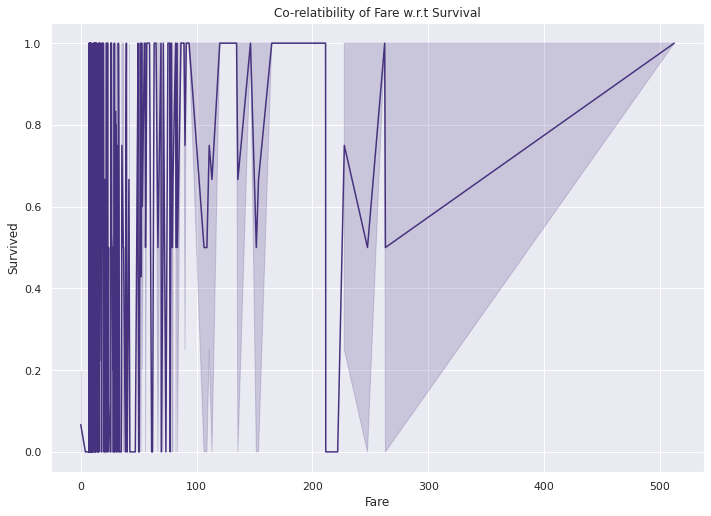

In [19]:
sns.lineplot(data=newDf, x = 'Fare', y= 'Survived').set(title = 'Co-relatibility of Fare w.r.t Survival')

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

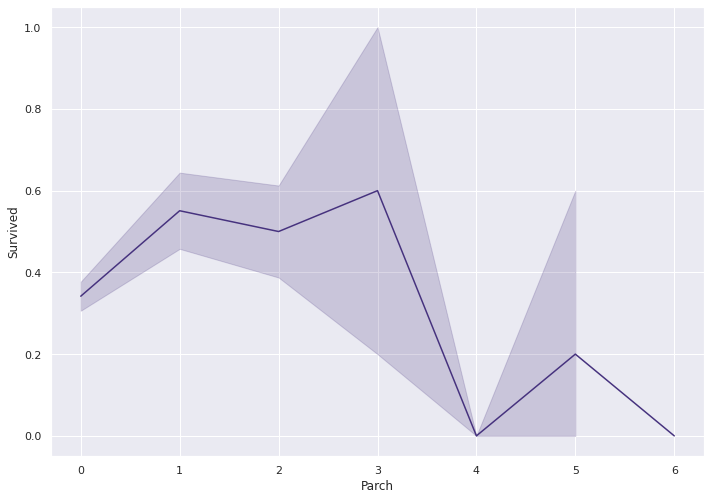

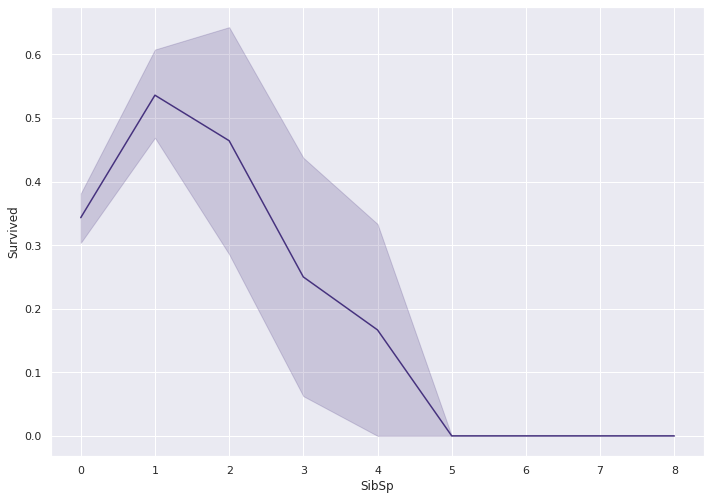

In [20]:
sns.lineplot(data=newDf, x = 'Parch', y= 'Survived')
plt.figure()
sns.lineplot(data=newDf, x = 'SibSp', y= 'Survived')

<AxesSubplot:>

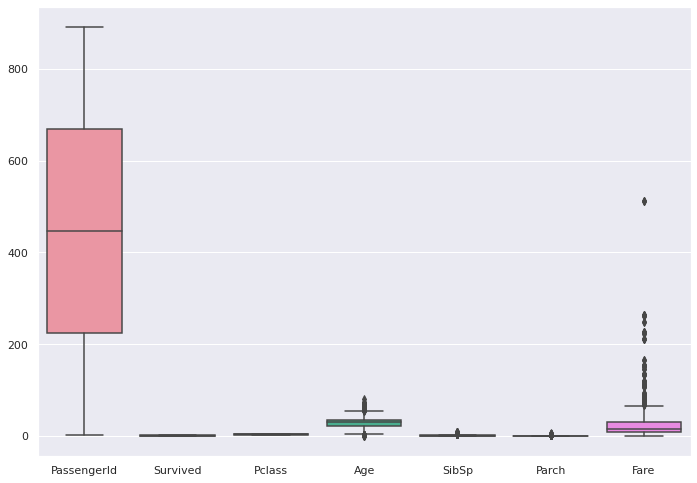

In [21]:
sns.boxplot(data=newDf)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

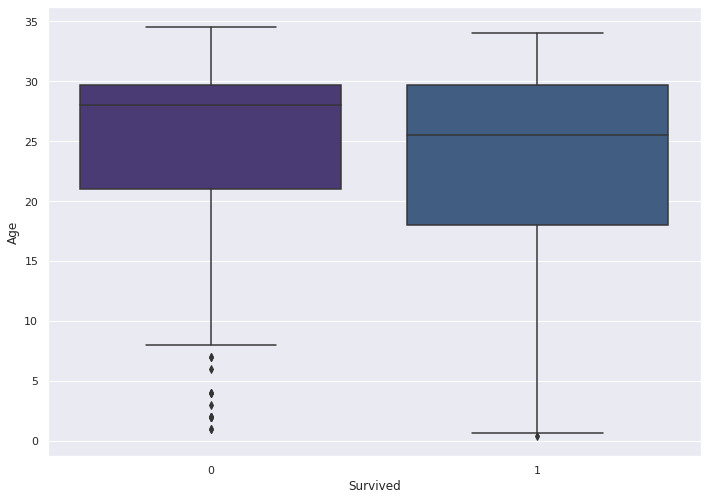

In [22]:
newDf = newDf[newDf['Age'] < 35]
sns.boxplot(data=newDf, y = 'Age', x = 'Survived')

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

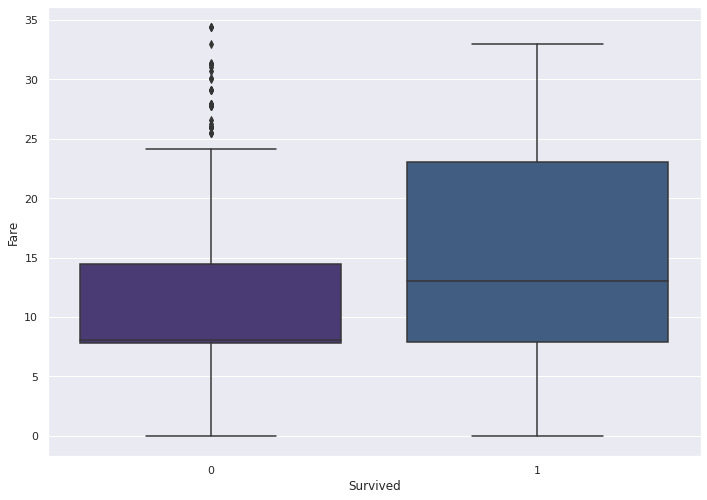

In [23]:
newDf = newDf[newDf['Fare'] <35]
sns.boxplot(data=newDf, x = 'Survived', y = 'Fare')

In [24]:
features = ['Age', 'Sex', "Pclass", "SibSp"]
x = newDf[features]
x['Sex'] = x['Sex'].map({'female': 0, 'male':1})
y = newDf['Survived']

In [25]:
xTrain, xTest, yTrain, yTest = train_test_split(x,y, random_state=200,test_size=0.2)

In [26]:
model = XGBClassifier(booster = 'gbtree', n_estimators=350, learning_rate=0.7, colsample_bytree=0.4)
model.fit(xTrain, yTrain)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.7, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=350,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [27]:
preds = model.predict(xTest)

In [28]:
testDf = pd.read_csv('../input/titanic/test.csv')

In [29]:
newTestDf = testDf[features]
newTestDf.isnull().sum()

Age       86
Sex        0
Pclass     0
SibSp      0
dtype: int64

In [30]:
newTestDf['Age'] = newTestDf['Age'].fillna(newTestDf['Age'].mean())
newTestDf['Sex'] = newTestDf['Sex'].map({'female': 0, 'male':1})
newTestDf.isnull().sum()
testPreds = model.predict(newTestDf)

In [31]:
testPreds = model.predict(newTestDf)
testPreds

array([0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [32]:
output = pd.DataFrame({'PassengerId': testDf['PassengerId'],
                       'Survived': testPreds
                      })
output.to_csv('submission.csv', index=False)